In [1]:
import numpy as np
import nilearn.plotting as nplt
import nibabel as nib
import matplotlib.pyplot as plt
import os.path as op
from  nilearn.datasets import fetch_surf_fsaverage
from os import listdir

#bids_folder = '/Volumes/mrenkeED/data/ds-dnumrisk'
bids_folder = '/mnt_03/ds-dnumrisk' 
grad_folder = 'derivatives/gradients'
source_dir = op.join(bids_folder,grad_folder)

subList = [f[4:6] for f in listdir(op.join(bids_folder, grad_folder)) if f[0:4] == 'sub-' and len(f)==6]
#subList_npFiles = [f for f in listdir(op.join(bids_folder, grad_folder)) if f[0:4] == 'sub-'] #  and len(f)==45

from  nilearn.datasets import fetch_surf_fsaverage
fsaverage = fetch_surf_fsaverage() # default 5


In [ ]:
sub= 'All' # '0' # 
n_comp = 10
fn = op.join(bids_folder,grad_folder,f'sub-{sub}',f'sub-{sub}_gradients_N-{n_comp}.npy')
side_view = 'medial'
cmap = 'jet'

Text(0.5, 0.98, 'Group All, \n Average Magnitude Comparison task gradients')

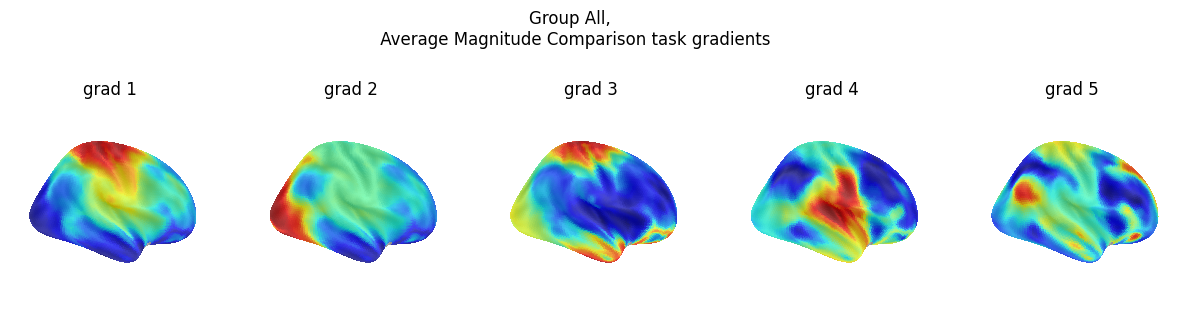

In [ ]:
n_comp = 5
figure, axes = plt.subplots(nrows=1, ncols=n_comp,figsize = (15,4), subplot_kw=dict(projection='3d'))

grad = np.load(fn)

for i in range(0,n_comp):
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]

    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.2 ,axes=axes[i]) #
    axes[i].set(title=f'grad {i+1}')
figure.suptitle(f'Group {sub}, \n Average Magnitude Comparison task gradients')



/tmp/ipykernel_1597029/4174383613.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(op.join(bids_folder,'plots_and_ims','avMagCompTask_gradients-N10.pdf'),bbox='tight')


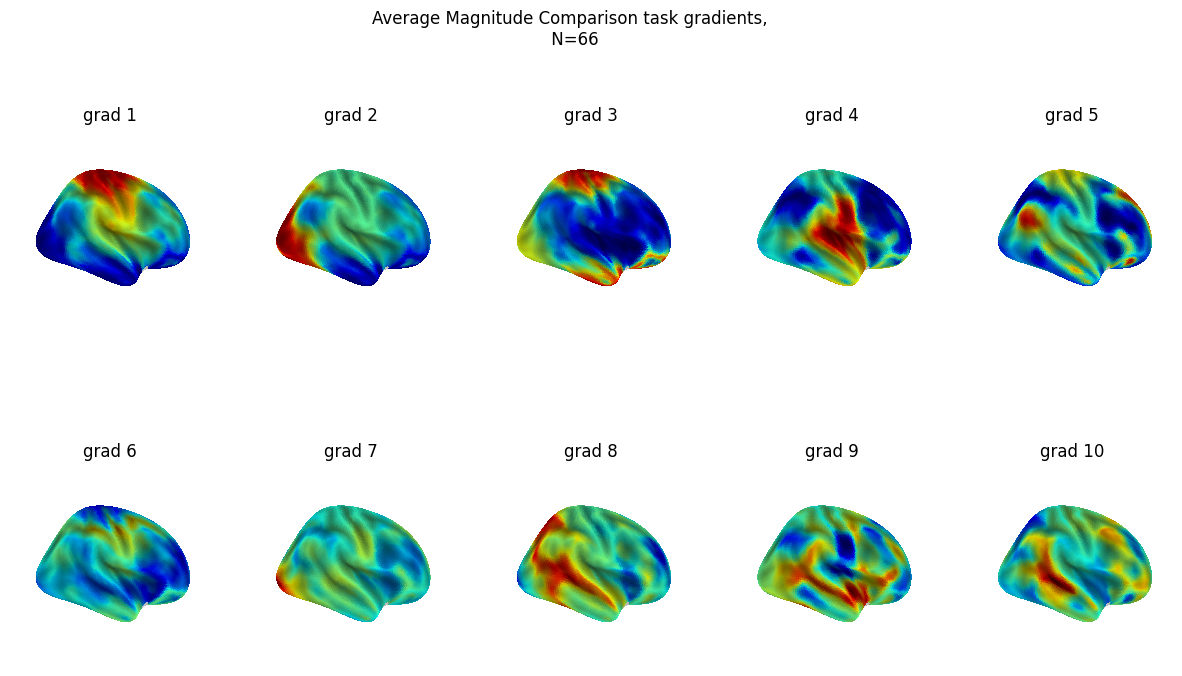

In [49]:
n_comp = 10
figure, axes = plt.subplots(nrows=2, ncols=int(n_comp/2),figsize = (15,8), subplot_kw=dict(projection='3d'))

grad = np.load(fn)

for i in range(0,n_comp):
    n_grad= i+1
    i_y = i if i < 5 else (i-5)
    i_x = 0 if i < 5 else 1
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7 ,axes=axes[i_x,i_y]) #
    axes[i_x,i_y].set(title=f'grad {n_grad}')

figure.suptitle('Average Magnitude Comparison task gradients, \n N=66')
plt.savefig(op.join(bids_folder,'plots_and_ims','avMagCompTask_gradients-N10.pdf'),bbox='tight')


# In Parcels

In [6]:
from utils import get_glasser_parcels
from brainspace.utils.parcellation import map_to_labels
 
gms = np.load(op.join(source_dir,f'gradients_av_glasserParcel_group-All.npy'),).T

space = 'fsaverage5'
mask, labeling = get_glasser_parcels(space = space )
print(mask.sum())

grad = [None] * 10
for i, g in enumerate(gms): # unaligned
    grad[i] = map_to_labels(g, labeling, mask=mask, fill=np.nan)


18742


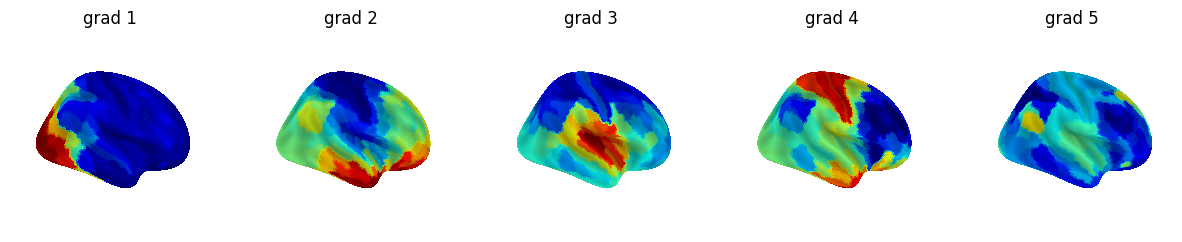

In [14]:
from  nilearn.datasets import fetch_surf_fsaverage
import nilearn.plotting as nplt
import matplotlib.pyplot as plt

fsaverage = fetch_surf_fsaverage(space) 
side_view = 'medial'
cmap = 'jet'
n_comp = 5
figure, axes = plt.subplots(nrows=1, ncols=n_comp,figsize = (15,4), subplot_kw=dict(projection='3d'))

for i in range(0,n_comp):
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]

    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.5 ,axes=axes[i]) #
    axes[i].set(title=f'grad {i+1}')

## Eigenvalues - lamdas ! 

variance explained ?!



In [73]:
n_comp=10
fn_lambdas = op.join(bids_folder,grad_folder,f'sub-{sub}',f'sub-{sub}_lambdas_N-{n_comp}.npy')
lambdas = np.load(fn_lambdas)
lambdas


array([10.65505994,  9.09335413,  4.86270792,  3.85546393,  2.53259465,
        2.05206166,  1.64467689,  1.50997441,  1.31153224,  1.15777083])

In [19]:
# with parcellation
sub = 'Glasser Parcellation'
lambdas = np.load(op.join(source_dir,f'lambdas_av_glasserParcel_group-All.npy'))
lambdas

array([14.51176022, 10.78783298,  6.17746452,  4.20209902,  3.25260903,
        2.30962262,  2.21561812,  1.76799899,  1.62626289,  1.47558867])

Text(0.5, 1.0, 'Glasser Parcellation, \n Component Lambdas')

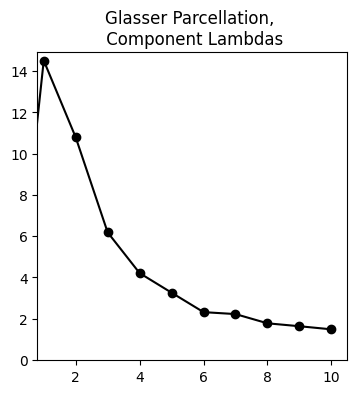

In [20]:
fig, (ax) = plt.subplots(1,1, figsize=(4,4), facecolor='white')

vals = lambdas #/ np.sum(lam)
vals = np.hstack((0,vals))
#ax.semilogx(vals, marker='o', mfc='k', mec='k', linestyle='-', color='k')
ax.plot(vals, marker='o', mfc='k', mec='k', linestyle='-', color='k')
ax.set_ylim([-0.025,np.max(vals)+0.4])
ax.set_xlim(xmin=0.8)
ax.set_title(f'{sub}, \n Component Lambdas') # 

# vis nPRF r2 in same way

In [7]:
print(nPRF_fn)

/mnt_03/ds-dnumrisk/derivatives/encoding_model.denoise/averages/group-All_desc-r2.optim.nilearn_space-fsaverage5_hemi-R.func.gii


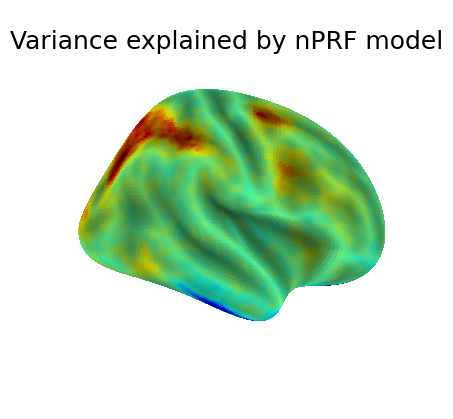

In [9]:
from  nilearn.datasets import fetch_surf_fsaverage
key = 'encoding_model.denoise'
nPRF_dir = op.join(bids_folder,'derivatives',key,'averages')
par = 'r2'
space = 'fsaverage5'

fsaverage = fetch_surf_fsaverage() # default 5

hemi='R'
nPRF_fn =  op.join(nPRF_dir, f'group-all_desc-{par}.optim.nilearn_space-{space}_hemi-{hemi}.func.gii')
nprf_r2_R = nib.load(nPRF_fn).agg_data()

map = nprf_r2_R

nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= map, # infl_right # pial_right
            view= side_view,cmap=cmap, colorbar=False, title=f'Variance explained by nPRF model',
            bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7) #

plt.show()


## Plot Individ. gradients

In [ ]:
sub_id = 1
sub = '%02d' % int(sub_id)
source_dir = op.join(bids_folder, 'derivatives', 'gradients', f'sub-{sub}')
fn_grad =  op.join(source_dir,f'sub-{sub}_gradients_space-fsaverag5_n10.npy')
fn_aligned =  op.join(source_dir,f'sub-{sub}_g-aligned_space-fsaverag5_n10.npy')

Text(0.5, 0.71, 'sub01 - gradients')

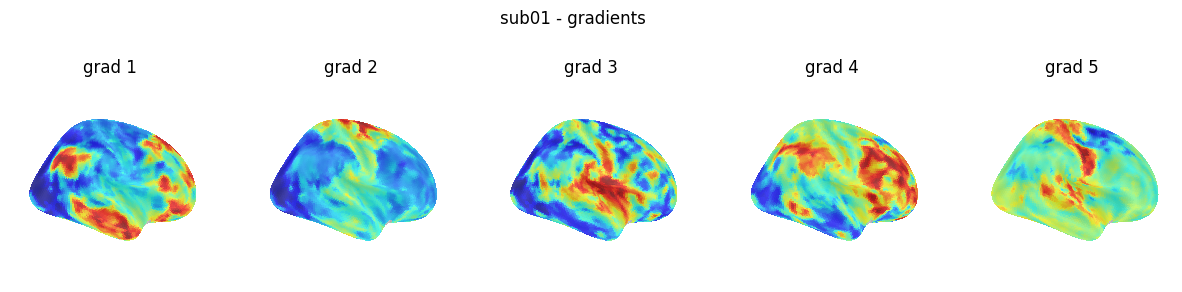

In [18]:
n_comp = 5
#figure, axes = plt.subplots(nrows=2, ncols=int(n_comp/2),figsize = (15,8), subplot_kw=dict(projection='3d'))
figure, axes = plt.subplots(nrows=1, ncols=n_comp,figsize = (15,8), subplot_kw=dict(projection='3d'))

grad = np.load(fn_grad)
for i in range(0,n_comp):
    n_grad= i+1
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7 ,axes=axes[i]) #
    axes[i].set(title=f'grad {n_grad}')
figure.suptitle(f'sub-{sub} - gradients',y = 0.71 )

Text(0.5, 0.5, 'g-aligend')

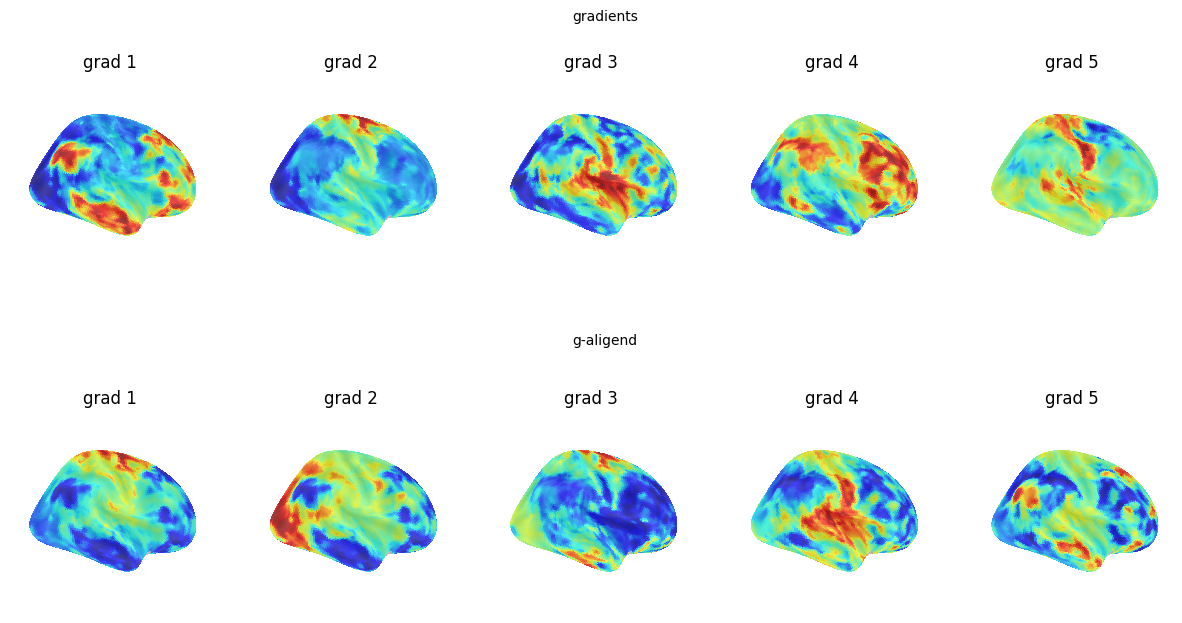

In [24]:
figure, axes = plt.subplots(nrows=2, ncols=n_comp,figsize = (15,8), subplot_kw=dict(projection='3d'))

row = 0
grad = np.load(fn_grad)
for i in range(0,n_comp):
    n_grad= i+1
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7 ,axes=axes[row,i]) #
    axes[row,i].set(title=f'grad {n_grad}')

row = 1
grad = np.load(fn_aligned)
for i in range(0,n_comp):
    n_grad= i+1
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7 ,axes=axes[row,i]) #
    axes[row,i].set(title=f'grad {n_grad}')

figure.text(x=0.5,y=0.9, s='gradients') # , va='top'
figure.text(x=0.5,y=0.5,s='g-aligend', va='center')

#figure.suptitle(f'sub-{sub} -  aligned',va='center') # y = 0.71,  

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=n_comp,figsize = (15,8), subplot_kw=dict(projection='3d'))

grad = np.load(fn_aligned)
for i in range(0,n_comp):
    n_grad= i+1
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7 ,axes=axes[i]) #
    axes[i].set(title=f'grad {n_grad}')
figure.suptitle(f'sub-{sub} -  aligned',y = 0.71 )

Text(0.5, 0.98, 'sub-03')

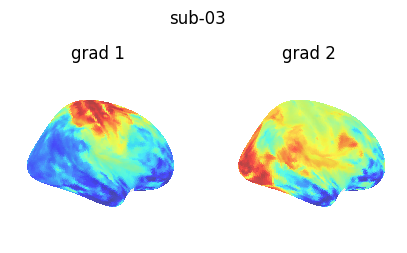

In [10]:
sub = '03'
source_folder_gm = op.join(bids_folder,'derivatives','gradients',f'sub-{sub}')
gm_aligned_fn = op.join(source_folder_gm,f'sub-{sub}_g-aligned_space-fsaverag5_n10.npy')

n_comp = 2
side_view = 'medial'
cmap = 'jet'
figure, axes = plt.subplots(nrows=1, ncols=n_comp,figsize = (5,3), subplot_kw=dict(projection='3d'))

grad = np.load(gm_aligned_fn)

for i in range(0,n_comp):
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]

    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.2 ,axes=axes[i]) #
    axes[i].set(title=f'grad {i+1}')
figure.suptitle(f'sub-{sub}')



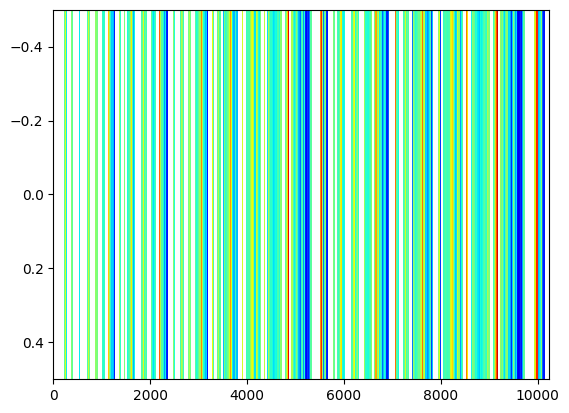

In [31]:
grad = np.load(gm_aligned_fn)


gm = np.split(grad[1],2) # for i, hemi in enumerate(['L', 'R']): --> left first
gm_r = -gm[0]
gm_r_2d = gm_r.reshape(1, -1)

plt.imshow(gm_r_2d, cmap='jet', aspect='auto', )


## Old

In [ ]:
from utils import plot_GM12_from_sum_npfile

plot_GM12_from_sum_npfile(n_comp=5,file=fn,cmap='jet')